## Exploratory Data Analysis

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# read the data

FullData=pd.read_csv('cs-training.csv')

In [4]:
FullData.shape

(150000, 12)

In [5]:
FullData.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
FullData.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [8]:
FullData=FullData.rename(columns={'Unnamed: 0':'Index'})
FullData=FullData.set_index('Index')
FullData.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
FullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [10]:
FullData.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [11]:
# response variable

FullData.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [12]:
# explanatory variables--RevolvingUtilizationOfUnsecuredLines

FullData.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

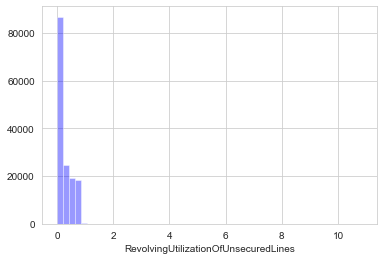

In [17]:
sns.set_style('whitegrid')
sns.distplot(np.log(FullData.RevolvingUtilizationOfUnsecuredLines+1),kde=False, color='b')

In [13]:
## Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit:

FullData[(FullData.RevolvingUtilizationOfUnsecuredLines>=0) & (FullData.RevolvingUtilizationOfUnsecuredLines<=1)].SeriousDlqin2yrs.mean()

0.05991996127598361

In [16]:
default_prop = []
for i in range(int(FullData["RevolvingUtilizationOfUnsecuredLines"].max())):
    temp_ = FullData[FullData["RevolvingUtilizationOfUnsecuredLines"] >= i]
    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])
    default_prop

In [18]:
# explanatory variables--age

FullData.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

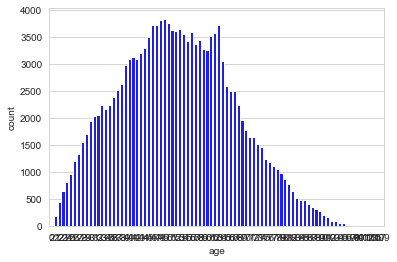

In [19]:
sns.countplot(x='age', data=FullData, color='b')

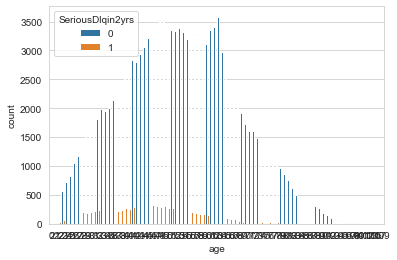

In [20]:
sns.countplot(x='age', hue='SeriousDlqin2yrs', data=FullData)

In [30]:
# explanatory variables--DebtRatio

FullData.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [40]:
FullData[FullData.DebtRatio<=1.0].DebtRatio.count() / FullData.DebtRatio.count()

0.7657533333333333

In [44]:
FullData[FullData.DebtRatio<=2.0].DebtRatio.count() / FullData.DebtRatio.count()

0.7930333333333334

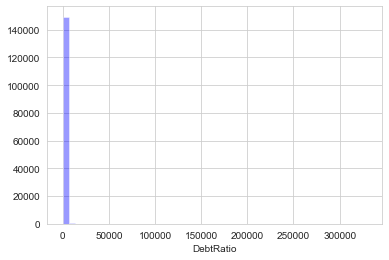

In [31]:
sns.set_style('whitegrid')
sns.distplot(FullData.DebtRatio,kde=False, color='b')

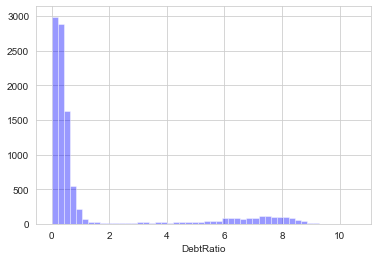

In [35]:
sns.distplot(np.log(FullData[FullData.SeriousDlqin2yrs==1].DebtRatio+1),kde=False, color='b')

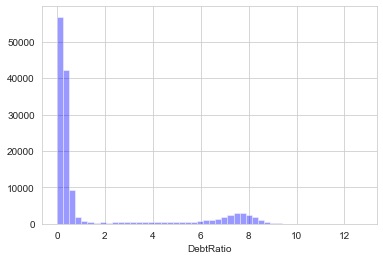

In [36]:
sns.distplot(np.log(FullData[FullData.SeriousDlqin2yrs==0].DebtRatio+1),kde=False, color='b')

In [21]:
# explanatory variables--MonthlyIncome

FullData.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

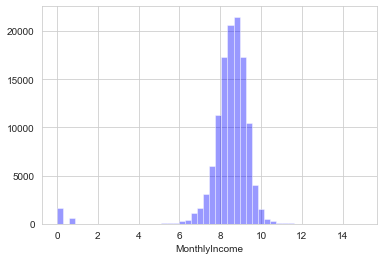

In [22]:
sns.distplot(np.log(FullData.MonthlyIncome+1),kde=False, color='b')

In [23]:
FullData[FullData.MonthlyIncome==0].MonthlyIncome.count()

1634

In [24]:
FullData[FullData.MonthlyIncome<100].MonthlyIncome.count()

2277

In [25]:
FullData[FullData.MonthlyIncome==0].DebtRatio.describe()

count     1634.000000
mean      1573.567319
std       2818.015889
min          0.000000
25%         96.000000
50%        930.000000
75%       2185.250000
max      60212.000000
Name: DebtRatio, dtype: float64

In [60]:
FullData[FullData.DebtRatio>2].MonthlyIncome.isnull().sum()/FullData.MonthlyIncome.isnull().sum()

0.9331674010292288

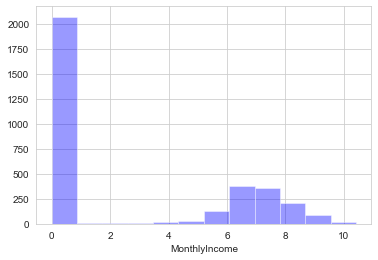

In [29]:
sns.distplot(np.log(FullData[FullData.DebtRatio>2].MonthlyIncome+1),kde=False, color='b')

In [37]:
len(FullData[(FullData.DebtRatio>2) & (FullData.MonthlyIncome==0)])/FullData[FullData.DebtRatio>2].MonthlyIncome.count()

0.4589518327779461

In [61]:
# explanatory variables--NumberOfDependents

FullData.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [62]:
FullData.NumberOfDependents.value_counts(dropna=False)

0.0     86902
1.0     26316
2.0     19522
3.0      9483
NaN      3924
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [63]:
FullData[FullData.NumberOfDependents.isnull()].SeriousDlqin2yrs.value_counts(dropna=False)

0    3745
1     179
Name: SeriousDlqin2yrs, dtype: int64

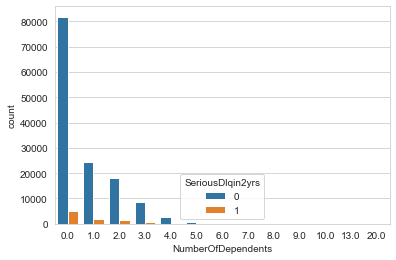

In [64]:
sns.countplot(x=FullData.NumberOfDependents, hue=FullData.SeriousDlqin2yrs)

In [65]:
# explanatory variables--NumberOfOpenCreditLinesAndLoans

FullData.NumberOfOpenCreditLinesAndLoans.value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
45        8
43        8
42        8
37        7
48        6
41        4
54        4
49        4
46        3
52        3
51        2
56        2
57        2
50        2
47        2
44        2
53        1
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [66]:
FullData.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

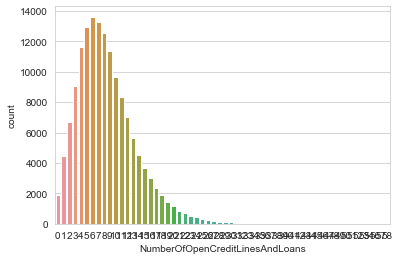

In [67]:
sns.countplot(x=FullData.NumberOfOpenCreditLinesAndLoans)

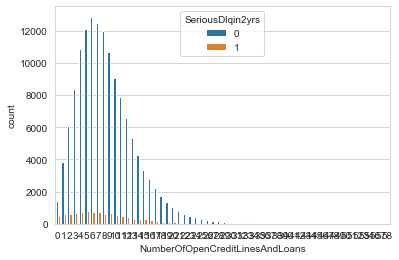

In [68]:
sns.countplot(x=FullData.NumberOfOpenCreditLinesAndLoans, hue=FullData.SeriousDlqin2yrs)

In [69]:
# explanatory variables--NumberRealEstateLoansOrLines

FullData.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

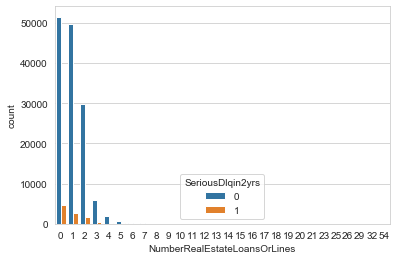

In [70]:
sns.countplot(x=FullData.NumberRealEstateLoansOrLines, hue=FullData.SeriousDlqin2yrs)

In [71]:
# explanatory variables--"NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse"

FullData['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [72]:
FullData['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [73]:
FullData['NumberOfTimes90DaysLate'].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [74]:
len(FullData[(FullData['NumberOfTime30-59DaysPastDueNotWorse']>=96) & (FullData['NumberOfTime60-89DaysPastDueNotWorse']>=96) & (FullData['NumberOfTime60-89DaysPastDueNotWorse']>=96)])

269

1. Dimension of the data: row: 150000, column: 11
2. Missing value: MonthlyIncome has 29731 (19.82%) missing value
                  NumberOfDependents has  3924 (2.61%) null values
3. columns:
   (1) SeriousDlqin2yrs: 
       (response variable. Only has two value: 0 and 1. )
           0: 139974 (about 93.3%)
           1: 10026 (about 6.7%)
       So it is an imbalance data. Then I will using AUC to evaluate the model performance
   (2) RevolvingUtilizationOfUnsecuredLines： 
       (Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.)
           5 number summary:0.00 0.03 0.15 0.56 50708.00
           distribution of values is right-skewed, consider removing outliers.
           since the proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit is 0.06, So, it is better to drop those rows of which 'RevolvingUtilizationOfUnsecuredLines' are greater than 13.
   (3) Age    
       (Age of borrower in years)
       5 number summary: 0.00  41.00  52.00  63.00  109.00
       The distribution is fine on the whole
       There seems more young people defaulting
   (4) DebtRatio
       (Monthly debt payments, alimony,living costs divided by monthy gross income)
       77.6% have DebtRatio less or equal to 1.0 
       79.3% have DebtRatio less or equal to 2.0
   (5) MonthlyIncome
       1634 (1.4%) people have no income; 2277(1.8%) people have income lower than 100 dollars.
       The distribution of ln(MonthlyIncome+1) is almost normal with some outliers.
       93.3% missing value exist when DebtRatio is greater than 2       
       Among those who have DebtRatio greater than 2, 45.9 % has no monthy income.
   (6) NumberOfDependents
       (Number of dependents in family excluding themselves (spouse, children etc.))
       right skewed.The missing value should be filled with the median
   (7) NumberOfOpenCreditLinesAndLoans
       (Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards))
       The distribution is right skewed       
   (8) NumberRealEstateLoansOrLines
       (Number of mortgage and real estate loans including home equity lines of credit)
       Right skewed        
   (9) NumberOfTime30-59DaysPastDueNotWorse
       (Number of times borrower has been 30-59 days past due but no worse in the last 2 years)
   (10)NumberOfTime60-89DaysPastDueNotWorse
       right skewed
   (11)NumberOfTimes90DaysLate
       (Number of times borrower has been 90 days or more past due.)
       Right skewed
       The three columns: "NumberOfTimes90DaysLate", 
                          "NumberOfTime60-89DaysPastDueNotWorse", 
                           "NumberOfTime30-59DaysPastDueNotWorse"
       share the same values", specifically 96 and 98. Maybe it is good to remove those rows.
  

## Data Pre-processing

In [75]:
# filling the missing value

FullData.MonthlyIncome=FullData.MonthlyIncome.fillna(FullData[FullData.DebtRatio>2].MonthlyIncome.median())
FullData.NumberOfDependents=FullData.NumberOfDependents.fillna(FullData.NumberOfDependents.median())

In [76]:
# droping data which have none sense
FullData=FullData[FullData.RevolvingUtilizationOfUnsecuredLines<13]

In [77]:
FullData=FullData[(FullData['NumberOfTime30-59DaysPastDueNotWorse']<96) & (FullData['NumberOfTime60-89DaysPastDueNotWorse']<96) & (FullData['NumberOfTime60-89DaysPastDueNotWorse']<96)]

In [78]:
FullData=FullData.drop_duplicates()

In [79]:
FullData.shape

(148764, 11)

In [80]:
# breaking the dataset into training and testing subsets

from sklearn.model_selection import train_test_split
dx=FullData.iloc[:, 1:]
dy=FullData.iloc[:, 0]
seed=20200725
test_size=0.3
x_train, x_test, y_train,y_test=train_test_split(dx, dy, test_size=test_size, random_state=seed)

## Models evaluation

### 1. Logistic Regression Model

In [82]:
# normalize the data

from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(x_train)
x_train_n=scaler.transform(x_train)
x_test_n=scaler.transform(x_test)

In [81]:
# build the model
from sklearn.linear_model import LogisticRegression

In [83]:
lr_model=LogisticRegression()
lr_model.fit(x_train_n, y_train)
lr_pred=lr_model.predict_proba(x_test_n)
lr_prob=lr_pred[:,1]

In [85]:
# evaluate
from sklearn.metrics import roc_auc_score

In [86]:
lr_auc=roc_auc_score(y_test, lr_prob)
lr_auc

0.6039575886320427

### 2. Random Forrest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf_auc=[]
for n in np.arange(100, 1100, 100):
    rf_model=RandomForestClassifier(n_estimators=n,n_jobs=-1)
    rf_model.fit(x_train, y_train)
    rf_pred=rf_model.predict_proba(x_test)
    rf_prob=rf_pred[:,1]
    rf_auc.append(roc_auc_score(y_test, rf_prob))
    print('Number of trees is {}, the auc score is {}'.format(n,roc_auc_score(y_test, rf_prob)))

Number of trees is 100, the auc score is 0.8384664551841793
Number of trees is 200, the auc score is 0.8450036116551507
Number of trees is 300, the auc score is 0.8492329452731694
Number of trees is 400, the auc score is 0.84769037927699
Number of trees is 500, the auc score is 0.8495003545308575
Number of trees is 600, the auc score is 0.851000238920934
Number of trees is 700, the auc score is 0.8486861803040531
Number of trees is 800, the auc score is 0.850257295678947
Number of trees is 900, the auc score is 0.8494682883766638
Number of trees is 1000, the auc score is 0.8505831672586313


### 3. Xgboost Model

In [88]:
from xgboost import XGBClassifier 

In [89]:
xgb_model=XGBClassifier(eta=0.1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
xgb_pred=xgb_model.predict_proba(x_test)
xgb_prob=xgb_pred[:,1]

In [91]:
xgb_auc=roc_auc_score(y_test, xgb_prob)
xgb_auc

0.8648455641832244

* Summary of AUC scores:
  1. Logistic Regression model: 0.604
  2. Random Forest model: 0.851(600 trees)
  3. Xgboost model: 0.865
           
* It is obvious to see that Xgboost has the highest auc scores which indicates a best predictive performance.<br/>
  Later I will use the Xgboost to make a prediction

## Optimizing The Model And Make A Prediction

In [107]:
# optimizing the Xgboost model

xgb_model=XGBClassifier(eta=0.01,n_estimators=1000, max_depth=6)
eval_set=[(x_train,y_train),(x_test,y_test)]
xgb_model.fit(x_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True,early_stopping_rounds=50)

[0]	validation_0-auc:0.85591	validation_1-auc:0.84876
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.85752	validation_1-auc:0.85016
[2]	validation_0-auc:0.85753	validation_1-auc:0.84990
[3]	validation_0-auc:0.86231	validation_1-auc:0.85431
[4]	validation_0-auc:0.86245	validation_1-auc:0.85457
[5]	validation_0-auc:0.86253	validation_1-auc:0.85454
[6]	validation_0-auc:0.86254	validation_1-auc:0.85466
[7]	validation_0-auc:0.86257	validation_1-auc:0.85461
[8]	validation_0-auc:0.86257	validation_1-auc:0.85452
[9]	validation_0-auc:0.86265	validation_1-auc:0.85469
[10]	validation_0-auc:0.86269	validation_1-auc:0.85470
[11]	validation_0-auc:0.86369	validation_1-auc:0.85521
[12]	validation_0-auc:0.86372	validation_1-auc:0.85529
[13]	validation_0-auc:0.86393	validation_1-auc:0.85547
[14]	validation_0-auc:0.86411	validation_1-auc:0.85549
[15]	validation_0-auc:0.8641

[146]	validation_0-auc:0.87965	validation_1-auc:0.85969
[147]	validation_0-auc:0.87975	validation_1-auc:0.85969
[148]	validation_0-auc:0.87987	validation_1-auc:0.85974
[149]	validation_0-auc:0.87997	validation_1-auc:0.85980
[150]	validation_0-auc:0.88006	validation_1-auc:0.85982
[151]	validation_0-auc:0.88014	validation_1-auc:0.85985
[152]	validation_0-auc:0.88023	validation_1-auc:0.85991
[153]	validation_0-auc:0.88034	validation_1-auc:0.85994
[154]	validation_0-auc:0.88042	validation_1-auc:0.85996
[155]	validation_0-auc:0.88051	validation_1-auc:0.86000
[156]	validation_0-auc:0.88058	validation_1-auc:0.86002
[157]	validation_0-auc:0.88067	validation_1-auc:0.86004
[158]	validation_0-auc:0.88075	validation_1-auc:0.86007
[159]	validation_0-auc:0.88085	validation_1-auc:0.86011
[160]	validation_0-auc:0.88092	validation_1-auc:0.86013
[161]	validation_0-auc:0.88097	validation_1-auc:0.86015
[162]	validation_0-auc:0.88105	validation_1-auc:0.86019
[163]	validation_0-auc:0.88114	validation_1-auc:

[293]	validation_0-auc:0.89186	validation_1-auc:0.86217
[294]	validation_0-auc:0.89195	validation_1-auc:0.86218
[295]	validation_0-auc:0.89204	validation_1-auc:0.86216
[296]	validation_0-auc:0.89212	validation_1-auc:0.86217
[297]	validation_0-auc:0.89227	validation_1-auc:0.86219
[298]	validation_0-auc:0.89242	validation_1-auc:0.86223
[299]	validation_0-auc:0.89257	validation_1-auc:0.86226
[300]	validation_0-auc:0.89270	validation_1-auc:0.86228
[301]	validation_0-auc:0.89280	validation_1-auc:0.86228
[302]	validation_0-auc:0.89290	validation_1-auc:0.86229
[303]	validation_0-auc:0.89305	validation_1-auc:0.86232
[304]	validation_0-auc:0.89318	validation_1-auc:0.86234
[305]	validation_0-auc:0.89326	validation_1-auc:0.86235
[306]	validation_0-auc:0.89336	validation_1-auc:0.86235
[307]	validation_0-auc:0.89347	validation_1-auc:0.86235
[308]	validation_0-auc:0.89360	validation_1-auc:0.86238
[309]	validation_0-auc:0.89370	validation_1-auc:0.86239
[310]	validation_0-auc:0.89377	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
# using the whole "FullData" dataset as the training data, using the model with eta=0.01 and n_estimators=868 to train the data

xgb_model=XGBClassifier(eta=0.01,n_estimators=868, max_depth=6)
xgb_model.fit(dx, dy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=868, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
# read the testing data

TestData=pd.read_csv('cs-test.csv')
TestData.shape

(101503, 12)

In [98]:
TestData.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [99]:
TestData=TestData.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1)
TestData.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [111]:
FinalPredict=xgb_model.predict_proba(TestData)
FinalResult=pd.DataFrame({'Id': np.arange(1, len(TestData)+1,1),
                         'Probability':FinalPredict[:,1]})
FinalResult.to_csv('FinalResult.csv', index=False)

The final auc is 0.86562.